# Data Cleaning task

In this task we will perform data cleaning using titanic dataset

In [312]:
import pandas as pd

# Load Titanic dataset
titanic = pd.read_csv('titanic/train.csv')


In [313]:
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [314]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [315]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 1. Handling missing data

Pandas uses different sentinel values to represent missing (NA) data depending on the data type:

- **numpy.nan:** For NumPy types. It forces data to be coerced to np.float64 or object.
- **NaT:** For np.datetime64, np.timedelta64, and PeriodDtype.
- **NA:** For StringDtype, Int64Dtype, Float64Dtype, BooleanDtype, and ArrowDtype. These types preserve the original data type. 

To detect missing values, use **isna()** or** notna()**.

In [316]:
# Check for missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### **dropna()** dropa rows or columns with missing data.
Dropping is a good option if only a small portion of the data is missing and if removing it won’t bias the analysis.

In [317]:
titanic.dropna(inplace=False)  

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


### **fillna()** replaces NA values with non-NA data.
Rather than dropping rows, we can fill the missing values using imputation techniques like mean, median, mode, or custom values.

In [318]:
# Fill with mean (for numeric columns like age)
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic['Age']

C:\Users\mennaallah.osman\AppData\Local\Temp\ipykernel_29220\2707852351.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)


0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [319]:
# Fill with mode (for categorical columns like capin and embarked)
print(titanic.Embarked[titanic['Embarked'].isna()])
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace= True)


61     NaN
829    NaN
Name: Embarked, dtype: object


C:\Users\mennaallah.osman\AppData\Local\Temp\ipykernel_29220\765787311.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace= True)


In [320]:
# viewing the data that is filled with mode
titanic.loc[[61,829], 'Embarked']

61     S
829    S
Name: Embarked, dtype: object

The Cabin column has a high proportion of missing values (687), and it don’t  provide significant insights thus best the column is a good opyionoption 

In [321]:
titanic.drop('Cabin', axis=1, inplace=True)

## 2. Handling Duplicates
check whether an Index (storing the row or column labels) is unique with Index.is_unique

In [322]:
titanic.index.is_unique

True

In [323]:
titanic.columns.is_unique

True

In [324]:
titanic.duplicated().sum()

0

This datset has no duplicates however we can drop duplicated using drop duplicate method

In [325]:
titanic.drop_duplicates() 
# to drop dublicates in PassengerId column and  Keeping the first occurrence of the duplicate
titanic_cleaned = titanic.drop_duplicates(subset=['PassengerId'], keep='first')


## 3. Handling Incorrect Data Types
To fix incorrect data types, Pandas provides various conversion methods, such as astype() for explicit casting or specific functions for dates and categories.

In [326]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [327]:
# Convert Survived to Boolean Type
titanic['Survived'] = titanic['Survived'].astype('bool')
titanic.dtypes

PassengerId      int64
Survived          bool
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

## 4. Handling Outliers
An outlier is “an observation that deviates so much from other
observations as to arouse suspicion that it was generated by a
different mechanism” 

### Identifying Outliers
#### 1. Using the Interquartile Range (IQR)
The IQR method is one of the most common ways to identify outliers. It defines outliers as values that fall outside of 1.5 times the IQR below the first quartile (Q1) or above the third quartile (Q3).

In [328]:
Q1 = titanic['Fare'].quantile(0.25) #1st quartile
Q3 = titanic['Fare'].quantile(0.75) #2nd quartile
IQR = Q3 - Q1  # Computing the interquartile range
print(IQR)

lower_bound = Q1 - 1.5 * IQR
print(lower_bound)
upper_bound = Q3 + 1.5 * IQR
print(upper_bound)

IQR_outliers = titanic[(titanic['Fare'] < lower_bound) | (titanic['Fare'] > upper_bound)]
IQR_outliers

23.0896
-26.724
65.6344


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
27,28,False,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
31,32,True,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,C
34,35,False,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C
52,53,True,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...,...
846,847,False,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,S
849,850,True,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C
856,857,True,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,S
863,864,False,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,S


Visualizing Outliers using boxplot

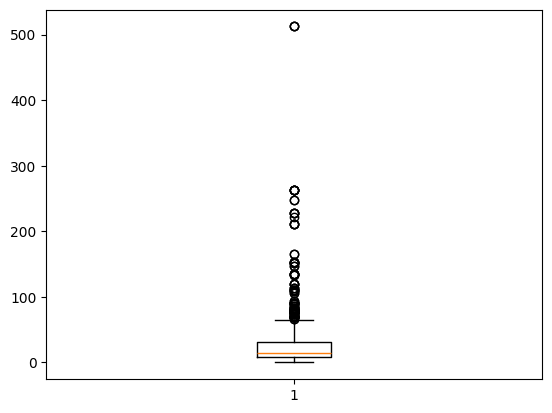

In [329]:
import matplotlib.pyplot as plt


plt.boxplot(x=titanic['Fare'])
plt.show()


#### 2. Using Z-Score (Standard Deviation)
The **Z-score** method calculates how many standard deviations a data point is from the mean. Typically, data points with z-scores beyond a certain threshold, often ±2 or ±3 are considered outliers.

Z-scores work well for normally distributed data but might not be suitable for skewed distributions (like Fare in Titanic).

In [330]:
from scipy import stats

In [331]:
# Calculate Z-scores for the 'Fare' column
z_scores = stats.zscore(titanic['Fare'])

# Identify outliers (Z-score > 3 or < -3)
z_score_outliers = titanic[(z_scores > 3) | (z_scores < -3)]
z_score_outliers.shape

(20, 11)

### Handling Outliers
#### 1. Removing Outliers
If outliers are data entry errors or extreme values that distort the analysis, you can remove them.


In [332]:
# Remove outliers based on IQR
titanic_cleaned = titanic[(titanic['Fare'] >= lower_bound) & (titanic['Fare'] <= upper_bound)]
titanic_cleaned

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
2,3,True,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,False,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
5,6,False,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,Q
...,...,...,...,...,...,...,...,...,...,...,...
886,887,False,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,True,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,True,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [333]:
# Remove outliers based on Z-score
titanic_cleaned = titanic[(z_scores < 3) & (z_scores > -3)]
titanic_cleaned

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,False,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,False,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,True,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,False,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,True,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


#### 2. Capping (Winsorizing)
Capping replaces outliers with a threshold value (e.g., replace values above the upper bound with the upper bound value). This preserves the dataset size while limiting the impact of extreme values.

Capping is a good option when you want to retain outliers but reduce their impact on the analysis

In [334]:
# Capping the fare column from the original titanic data 
titanic_cleaned['Fare'] = titanic['Fare'].clip(lower=lower_bound, upper=upper_bound)
titanic_cleaned.head(3)


C:\Users\mennaallah.osman\AppData\Local\Temp\ipykernel_29220\1146143396.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_cleaned['Fare'] = titanic['Fare'].clip(lower=lower_bound, upper=upper_bound)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,65.6344,C
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S


#### 3. Transforming Data
If outliers are part of a skewed distribution, transformations (e.g., log, square root) can make the data more normally distributed, reducing the effect of outliers.
By applying a logarithmic function to the data, we can compress the range of values, making outliers less extreme.

Use transformations when your data is skewed, and the outliers represent natural variability rather than errors.

C:\Users\mennaallah.osman\AppData\Local\Temp\ipykernel_29220\1961226742.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_cleaned['Fare_log'] = np.log1p(titanic['Fare'])  # Use log1p to handle zero values


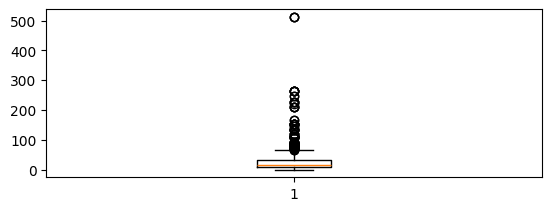

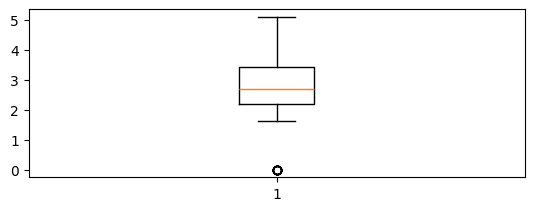

In [335]:
# Apply log transformation:
import numpy as np
titanic_cleaned['Fare_log'] = np.log1p(titanic['Fare'])  # Use log1p to handle zero values
plt.subplot(211)
plt.boxplot(x=titanic['Fare'])
plt.show()
plt.subplot(212)
plt.boxplot(x=titanic_cleaned['Fare_log'])
plt.show()

#### 4. Imputation
Rather than removing outliers, you can impute them with more reasonable values (e.g., the mean, median, or another calculated value).

Imputation is useful when you don't want to remove rows but need to moderate the influence of extreme values.

In [336]:
median_fare = titanic['Fare'].median()
titanic_cleaned.loc[titanic['Fare'] > upper_bound, 'Fare'] = median_fare
titanic_cleaned.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_log
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2.110213
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,14.4542,C,4.280593
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,2.188856


## 5. Handling Inconsistent Data
Inconsistent data refers to discrepancies or variations in values that should be uniform. It can occur due to data entry errors, differences in capitalization, formatting variations, or mixed representations of categorical values. 
###  Identifying Inconsistencies
1. Checking Unique Values in Categorical Columns

In [337]:
titanic['Embarked'].unique()


array(['S', 'C', 'Q'], dtype=object)

2. Check for Case Inconsistencies

In [338]:
# Check value counts while ignoring case
titanic['Sex'].str.lower().value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

3. Checking for Leading/Trailing Spaces

In [339]:
# This will count the number of rows where leading or trailing spaces are present.
titanic['Name'].str.strip().ne(titanic['Name']).sum()


2

In [340]:
titanic[titanic['Name'].str.strip().ne(titanic['Name'])]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
15,16,True,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.00,S
857,858,True,1,"Daly, Mr. Peter Denis",male,51.0,0,0,113055,26.55,S


### Handling Inconsistencies
Once identified, you can clean and standardize the inconsistent data.
1. Standardizing Categorical Values

In [341]:
titanic['Embarked'] = titanic['Embarked'].str.lower()
titanic['Sex'] = titanic['Sex'].str.lower()


2. Removing or Replacing Leading/Trailing Spaces


In [342]:
titanic['Name'] = titanic['Name'].str.strip()

In [343]:
titanic['Name'].str.strip().ne(titanic['Name']).sum()

0

## 6. Feature Scaling and Normalization
Feature Scaling and Normalization aim to adjust the numerical features of your dataset to a common scale without distorting differences in the ranges of values.

### 1. Standardization (Z-score normalization)
Standardization transforms features to have a ***mean of 0*** and a ***standard deviation of 1***.
$$
Standardized Value= (X−μ)/σ
$$
​

In [344]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()
# Fit and transform the 'Age' column
titanic['Fare_standardized'] = scaler.fit_transform(titanic[['Fare']])
titanic.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_standardized
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,s,-0.502445
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,c,0.786845
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,s,-0.488854


In [345]:
# Manual Z-Score Scaling using 
titanic['Age_standardized'] = (titanic['Age'] - titanic['Age'].mean()) / titanic['Age'].std()
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_standardized,Age_standardized
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,s,-0.502445,-0.592148
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,c,0.786845,0.638430
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,s,-0.488854,-0.284503


### 6.2. Min-Max Scaling (Normalization)
Normalization rescales the values to a fixed range, typically between 0 and 1.
$$
Min-Max Scaled Value= 
 
\frac{X−X 
min}
{​X 
max
​
 −X 
min}
$$
 
​


In [346]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the 'Fare' column
titanic['Fare_normalized'] = scaler.fit_transform(titanic[['Fare']])
titanic.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_standardized,Age_standardized,Fare_normalized
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,s,-0.502445,-0.592148,0.014151
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,c,0.786845,0.638430,0.139136
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,s,-0.488854,-0.284503,0.015469


In [347]:
# Manual Min-Max Scaling
titanic['Age_normalized'] = (titanic['Age'] - titanic['Age'].min()) / (titanic['Age'].max() - titanic['Age'].min())
titanic.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_standardized,Age_standardized,Fare_normalized,Age_normalized
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,s,-0.502445,-0.592148,0.014151,0.271174
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,c,0.786845,0.638430,0.139136,0.472229
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,s,-0.488854,-0.284503,0.015469,0.321438


### 6.3. Robust Scaling(IQR-based)
Robust scaling uses the median and IQR (interquartile range) for scaling. It’s less sensitive to outliers compared to Min-Max Scaling and Z-Score Scaling.

$$
x 
′
 = 
\frac{
𝑥
−
median
(
𝑥
)}
{IQR
(
𝑥
)

IQR(x)
x−median(x)}
$$
​
 


In [348]:
from sklearn.preprocessing import RobustScaler

# Initialize the scaler
scaler = RobustScaler()

# Fit and transform the 'Fare' column
titanic['Fare_robust'] = scaler.fit_transform(titanic[['Fare']])
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_standardized,Age_standardized,Fare_normalized,Age_normalized,Fare_robust
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,s,-0.502445,-0.592148,0.014151,0.271174,-0.312011
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,c,0.786845,0.638430,0.139136,0.472229,2.461242
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,s,-0.488854,-0.284503,0.015469,0.321438,-0.282777


### 6.4. Log Transformation
Log transformation reduces the impact of large values and normalizes the distribution. This technique is helpful for highly skewed data.
$$
x 
′
 =log(x+1)
$$
We add 1 to avoid taking the log of zero.

In [349]:
# Apply log transformation to 'Fare' column
titanic['Fare_log'] = np.log1p(titanic['Fare'])
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_standardized,Age_standardized,Fare_normalized,Age_normalized,Fare_robust,Fare_log
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,s,-0.502445,-0.592148,0.014151,0.271174,-0.312011,2.110213
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,c,0.786845,0.638430,0.139136,0.472229,2.461242,4.280593
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,s,-0.488854,-0.284503,0.015469,0.321438,-0.282777,2.188856


### 6.5  Max Abs Scaling
Max Abs Scaling scales each feature to the range [-1, 1] by dividing by the maximum absolute value of each feature. 
$$
Formula:

𝑥
′
=
\frac{𝑥}
{∣
𝑥
max
∣}
$$
​

In [350]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
titanic_scaled = scaler.fit_transform(titanic[['Fare', 'Age']])
titanic[['Fare_MaxAbsscaled', 'MaxAbsAge_scaled']] = titanic_scaled
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_standardized,Age_standardized,Fare_normalized,Age_normalized,Fare_robust,Fare_log,Fare_MaxAbsscaled,MaxAbsAge_scaled
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,s,-0.502445,-0.592148,0.014151,0.271174,-0.312011,2.110213,0.014151,0.275
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,c,0.786845,0.638430,0.139136,0.472229,2.461242,4.280593,0.139136,0.475
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,s,-0.488854,-0.284503,0.015469,0.321438,-0.282777,2.188856,0.015469,0.325


### 6.6. Decimal Scaling
The idea behind decimal scaling is to divide each value by a power of 10 that brings the largest absolute value of the feature into the desired range. The power of 10 is chosen based on the magnitude of the maximum absolute value in the data.


$$
𝑥′=
\frac{𝑥}{10^𝑗}
$$



In [351]:
# Step 1: Determine the maximum absolute value for 'Fare' column
max_abs_fare = np.max(np.abs(titanic['Fare']))

# Step 2: Calculate the smallest power of 10 that will scale the data between -1 and 1
j_fare = np.ceil(np.log10(max_abs_fare))

# Step 3: Scale 'Fare' by dividing each value by 10^j
titanic['Fare_decimal_scaled'] = titanic['Fare'] / (10 ** j_fare)
titanic.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Fare_standardized,Age_standardized,Fare_normalized,Age_normalized,Fare_robust,Fare_log,Fare_MaxAbsscaled,MaxAbsAge_scaled,Fare_decimal_scaled
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,s,-0.502445,-0.592148,0.014151,0.271174,-0.312011,2.110213,0.014151,0.275,0.007250
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,c,0.786845,0.638430,0.139136,0.472229,2.461242,4.280593,0.139136,0.475,0.071283
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,s,-0.488854,-0.284503,0.015469,0.321438,-0.282777,2.188856,0.015469,0.325,0.007925


### Checking the results

In [352]:
# Check summary statistics before scaling
print(titanic[['Fare', 'Age']].describe())

# Check summary statistics after scaling
print(titanic[['Fare_normalized', 'Age_standardized', 'Fare_robust', 'Fare_log']].describe())


             Fare         Age
count  891.000000  891.000000
mean    32.204208   29.699118
std     49.693429   13.002015
min      0.000000    0.420000
25%      7.910400   22.000000
50%     14.454200   29.699118
75%     31.000000   35.000000
max    512.329200   80.000000
       Fare_normalized  Age_standardized  Fare_robust    Fare_log
count       891.000000      8.910000e+02   891.000000  891.000000
mean          0.062858      2.272780e-16     0.768745    2.962246
std           0.096995      1.000000e+00     2.152200    0.969048
min           0.000000     -2.251891e+00    -0.626005    0.000000
25%           0.015440     -5.921480e-01    -0.283409    2.187218
50%           0.028213      0.000000e+00     0.000000    2.737881
75%           0.060508      4.076970e-01     0.716591    3.465736
max           1.000000      3.868699e+00    21.562738    6.240917


## 7. Handeling Categorical Data
Categorical variables are non-numeric data that represent discrete values or classes (e.g., "Sex", "Embarked", "Pclass" in the Titanic dataset). 

In [353]:
titanic.dtypes

PassengerId              int64
Survived                  bool
Pclass                   int64
Name                    object
Sex                     object
Age                    float64
SibSp                    int64
Parch                    int64
Ticket                  object
Fare                   float64
Embarked                object
Fare_standardized      float64
Age_standardized       float64
Fare_normalized        float64
Age_normalized         float64
Fare_robust            float64
Fare_log               float64
Fare_MaxAbsscaled      float64
MaxAbsAge_scaled       float64
Fare_decimal_scaled    float64
dtype: object

In [354]:
# Identify Categorical Variables
titanic.select_dtypes(include=['object', 'category']).columns

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

### 1. Label Encoding
Label encoding assigns a unique integer to each category. Use label encoding for ordinal features or when there are only two categories (binary variables). Avoid using label encoding for nominal features with more than two categories, as this can introduce artificial order.

In [355]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
titanic['Sex_encoded'] = le.fit_transform(titanic['Sex'])
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_standardized,Age_standardized,Fare_normalized,Age_normalized,Fare_robust,Fare_log,Fare_MaxAbsscaled,MaxAbsAge_scaled,Fare_decimal_scaled,Sex_encoded
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,-0.502445,-0.592148,0.014151,0.271174,-0.312011,2.110213,0.014151,0.275,0.007250,1
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0.786845,0.638430,0.139136,0.472229,2.461242,4.280593,0.139136,0.475,0.071283,0
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,-0.488854,-0.284503,0.015469,0.321438,-0.282777,2.188856,0.015469,0.325,0.007925,0


### 2. One-Hot Encoding
One-hot encoding converts each category into a separate binary (0 or 1) column. This technique is ideal for nominal variables (e.g., Embarked, Sex) without an inherent order.

In [356]:
titanic_cleaned = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True)
titanic_cleaned.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_normalized,Age_normalized,Fare_robust,Fare_log,Fare_MaxAbsscaled,MaxAbsAge_scaled,Fare_decimal_scaled,Sex_encoded,Embarked_q,Embarked_s
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0.014151,0.271174,-0.312011,2.110213,0.014151,0.275,0.007250,1,False,True
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0.139136,0.472229,2.461242,4.280593,0.139136,0.475,0.071283,0,False,False
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0.015469,0.321438,-0.282777,2.188856,0.015469,0.325,0.007925,0,False,True


### 3. Ordinal Encoding
Ordinal encoding is a variant of label encoding for ordinal variables with a meaningful order. You can manually assign values based on the category’s rank.

In [357]:
# Pclass 1 is the highest class and is assigned the highest number
titanic['P_class'] = titanic['Pclass'].map({1: 3, 2: 2, 3: 1})
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_standardized,Fare_normalized,Age_normalized,Fare_robust,Fare_log,Fare_MaxAbsscaled,MaxAbsAge_scaled,Fare_decimal_scaled,Sex_encoded,P_class
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,-0.592148,0.014151,0.271174,-0.312011,2.110213,0.014151,0.275,0.007250,1,1
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0.638430,0.139136,0.472229,2.461242,4.280593,0.139136,0.475,0.071283,0,3
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,-0.284503,0.015469,0.321438,-0.282777,2.188856,0.015469,0.325,0.007925,0,1


### 4. Binary Encoding
A technique for representing categorical variables as binary code. It represents each category as a series of binary digits. This method is implemented using external libraries like category_encoders.

In [358]:
import category_encoders as ce

# This will createnew column for ticket each represent a bit
encoder = ce.BinaryEncoder(cols=['Ticket'])
titanic_cleaned = encoder.fit_transform(titanic_cleaned)
titanic_cleaned.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket_0,Ticket_1,...,Fare_normalized,Age_normalized,Fare_robust,Fare_log,Fare_MaxAbsscaled,MaxAbsAge_scaled,Fare_decimal_scaled,Sex_encoded,Embarked_q,Embarked_s
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,0,0,...,0.014151,0.271174,-0.312011,2.110213,0.014151,0.275,0.007250,1,False,True
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,0,0,...,0.139136,0.472229,2.461242,4.280593,0.139136,0.475,0.071283,0,False,False
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,0,0,...,0.015469,0.321438,-0.282777,2.188856,0.015469,0.325,0.007925,0,False,True


### 5. Frequency or Count Encoding
Frequency encoding replaces each category with its count or frequency in the dataset. This method is useful when the frequency of a category is relevant to your analysis.

In [359]:
freq_map = titanic['Embarked'].value_counts(normalize=True)
titanic['Embarked_freq'] = titanic['Embarked'].map(freq_map)
titanic_cleaned.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket_0,Ticket_1,...,Fare_normalized,Age_normalized,Fare_robust,Fare_log,Fare_MaxAbsscaled,MaxAbsAge_scaled,Fare_decimal_scaled,Sex_encoded,Embarked_q,Embarked_s
0,1,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,0,0,...,0.014151,0.271174,-0.312011,2.110213,0.014151,0.275,0.007250,1,False,True
1,2,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,0,0,...,0.139136,0.472229,2.461242,4.280593,0.139136,0.475,0.071283,0,False,False
2,3,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,0,0,...,0.015469,0.321438,-0.282777,2.188856,0.015469,0.325,0.007925,0,False,True


## 8. Handelling String Data
### 1. Trimming Whitespace

In [360]:
# Remove leading and trailing spaces
titanic['Name'] = titanic['Name'].str.strip()


In [361]:
# Remove all extra spaces within the string
# \s matches any whitespace character
# + means "one or more" of the preceding elemen
titanic['Name'] = titanic['Name'].str.replace('\s+', ' ', regex=True)

### 2. Changing Case

In [362]:
titanic['Name'] = titanic['Name'].str.lower()
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_normalized,Age_normalized,Fare_robust,Fare_log,Fare_MaxAbsscaled,MaxAbsAge_scaled,Fare_decimal_scaled,Sex_encoded,P_class,Embarked_freq
0,1,False,3,"braund, mr. owen harris",male,22.0,1,0,A/5 21171,7.2500,...,0.014151,0.271174,-0.312011,2.110213,0.014151,0.2750,0.007250,1,1,0.725028
1,2,True,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,PC 17599,71.2833,...,0.139136,0.472229,2.461242,4.280593,0.139136,0.4750,0.071283,0,3,0.188552
2,3,True,3,"heikkinen, miss. laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0.015469,0.321438,-0.282777,2.188856,0.015469,0.3250,0.007925,0,1,0.725028
3,4,True,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,...,0.103644,0.434531,1.673732,3.990834,0.103644,0.4375,0.053100,0,3,0.725028
4,5,False,3,"allen, mr. william henry",male,35.0,0,0,373450,8.0500,...,0.015713,0.434531,-0.277363,2.202765,0.015713,0.4375,0.008050,1,1,0.725028


### 3. Replacing Substrings and Patterns

In [363]:
titanic['Name'] = titanic['Name'].str.replace('mr.', 'Mr.', regex=False)
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_normalized,Age_normalized,Fare_robust,Fare_log,Fare_MaxAbsscaled,MaxAbsAge_scaled,Fare_decimal_scaled,Sex_encoded,P_class,Embarked_freq
0,1,False,3,"braund, Mr. owen harris",male,22.0,1,0,A/5 21171,7.2500,...,0.014151,0.271174,-0.312011,2.110213,0.014151,0.275,0.007250,1,1,0.725028
1,2,True,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,PC 17599,71.2833,...,0.139136,0.472229,2.461242,4.280593,0.139136,0.475,0.071283,0,3,0.188552
2,3,True,3,"heikkinen, miss. laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0.015469,0.321438,-0.282777,2.188856,0.015469,0.325,0.007925,0,1,0.725028


### 4. Splitting and Extracting Substrings

In [364]:
titanic['Title'] = titanic['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Age_normalized,Fare_robust,Fare_log,Fare_MaxAbsscaled,MaxAbsAge_scaled,Fare_decimal_scaled,Sex_encoded,P_class,Embarked_freq,Title
0,1,False,3,"braund, Mr. owen harris",male,22.0,1,0,A/5 21171,7.2500,...,0.271174,-0.312011,2.110213,0.014151,0.275,0.007250,1,1,0.725028,Mr
1,2,True,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,PC 17599,71.2833,...,0.472229,2.461242,4.280593,0.139136,0.475,0.071283,0,3,0.188552,mrs
2,3,True,3,"heikkinen, miss. laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0.321438,-0.282777,2.188856,0.015469,0.325,0.007925,0,1,0.725028,miss


### 5. Concatenating Strings

In [365]:
titanic['Full_name'] = titanic['Name'].str.split(',').str[1].str.strip() + ' ' + titanic['Name'].str.split(',').str[0].str.strip()
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_robust,Fare_log,Fare_MaxAbsscaled,MaxAbsAge_scaled,Fare_decimal_scaled,Sex_encoded,P_class,Embarked_freq,Title,Full_name
0,1,False,3,"braund, Mr. owen harris",male,22.0,1,0,A/5 21171,7.2500,...,-0.312011,2.110213,0.014151,0.275,0.007250,1,1,0.725028,Mr,Mr. owen harris braund
1,2,True,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,PC 17599,71.2833,...,2.461242,4.280593,0.139136,0.475,0.071283,0,3,0.188552,mrs,mrs. john bradley (florence briggs thayer) cum...
2,3,True,3,"heikkinen, miss. laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,-0.282777,2.188856,0.015469,0.325,0.007925,0,1,0.725028,miss,miss. laina heikkinen


### 6. Checking and Validating String Content

In [366]:
titanic['Name'].str.contains('Mr\.', regex=True)


0       True
1      False
2      False
3      False
4       True
       ...  
886    False
887    False
888    False
889     True
890     True
Name: Name, Length: 891, dtype: bool

## 9. Data Binning
Data binning, also known as discretization, involves grouping continuous numerical data into discrete intervals or "bins."
**Types of Binning**
- Equal-width Binning: Divides data into bins of equal size.
- Equal-frequency Binning: Each bin contains approximately the same number of data points.
- Custom Binning: Uses predefined boundaries to create bins (e.g., specific age ranges).

### Equal-width Binning

In [367]:
# bins=5, Divides the range of Age into 5 equal-width intervals.
titanic['Age_bin_equal_width'] = pd.cut(titanic['Age'], bins=5, labels=['Very Young', 'Young', 'Middle-aged', 'Senior', 'Very Senior'])
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_log,Fare_MaxAbsscaled,MaxAbsAge_scaled,Fare_decimal_scaled,Sex_encoded,P_class,Embarked_freq,Title,Full_name,Age_bin_equal_width
0,1,False,3,"braund, Mr. owen harris",male,22.0,1,0,A/5 21171,7.2500,...,2.110213,0.014151,0.275,0.007250,1,1,0.725028,Mr,Mr. owen harris braund,Young
1,2,True,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,PC 17599,71.2833,...,4.280593,0.139136,0.475,0.071283,0,3,0.188552,mrs,mrs. john bradley (florence briggs thayer) cum...,Middle-aged
2,3,True,3,"heikkinen, miss. laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,2.188856,0.015469,0.325,0.007925,0,1,0.725028,miss,miss. laina heikkinen,Young


### Equal-frequency Binning (Quantile Binning)

In [368]:
# q=4: Divides the Age column into 4 bins, each containing an approximately equal number of data points.
titanic['Age_bin_equal_freq'] = pd.qcut(titanic['Age'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Fare_MaxAbsscaled,MaxAbsAge_scaled,Fare_decimal_scaled,Sex_encoded,P_class,Embarked_freq,Title,Full_name,Age_bin_equal_width,Age_bin_equal_freq
0,1,False,3,"braund, Mr. owen harris",male,22.0,1,0,A/5 21171,7.2500,...,0.014151,0.275,0.007250,1,1,0.725028,Mr,Mr. owen harris braund,Young,Q1
1,2,True,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,PC 17599,71.2833,...,0.139136,0.475,0.071283,0,3,0.188552,mrs,mrs. john bradley (florence briggs thayer) cum...,Middle-aged,Q4
2,3,True,3,"heikkinen, miss. laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0.015469,0.325,0.007925,0,1,0.725028,miss,miss. laina heikkinen,Young,Q2


### Custom Binning

In [369]:
bins = [0, 12, 18, 35, 60, 80]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

titanic['Age_bin_custom'] = pd.cut(titanic['Age'], bins=bins, labels=labels)
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,MaxAbsAge_scaled,Fare_decimal_scaled,Sex_encoded,P_class,Embarked_freq,Title,Full_name,Age_bin_equal_width,Age_bin_equal_freq,Age_bin_custom
0,1,False,3,"braund, Mr. owen harris",male,22.0,1,0,A/5 21171,7.2500,...,0.275,0.007250,1,1,0.725028,Mr,Mr. owen harris braund,Young,Q1,Young Adult
1,2,True,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,PC 17599,71.2833,...,0.475,0.071283,0,3,0.188552,mrs,mrs. john bradley (florence briggs thayer) cum...,Middle-aged,Q4,Adult
2,3,True,3,"heikkinen, miss. laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0.325,0.007925,0,1,0.725028,miss,miss. laina heikkinen,Young,Q2,Young Adult


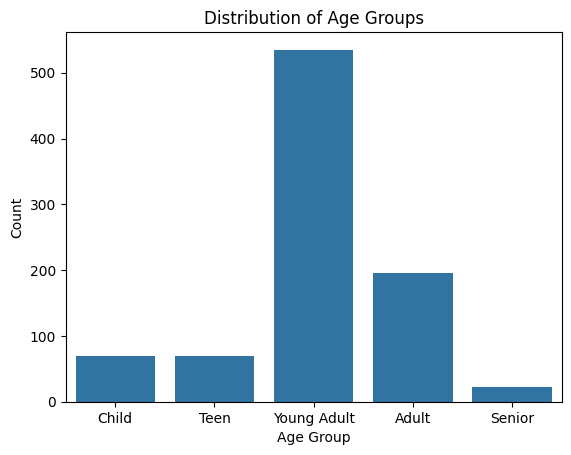

In [370]:
import seaborn as sns
sns.countplot(x='Age_bin_custom', data=titanic, order=labels)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

## 10. Feature Engineering
Feature engineering involves creating new features or modifying existing ones to improve the predictive power of your dataset.  In other words, it is the process of selecting, extracting, and transforming the most relevant features from the available data to build more accurate and efficient machine learning models.

### Feature Creation
Feature Creation is the process of generating new features based on domain knowledge or by observing patterns in the data.

**Types of Feature Creation:**
- Domain-Specific: Creating new features based on domain knowledge, such as creating features based on business rules or industry standards.
- Data-Driven: Creating new features by observing patterns in the data, such as calculating aggregations or creating interaction features.
- Synthetic: Generating new features by combining existing features or synthesizing new data points. 

In [371]:
# Using domain knowledge, we can create features that may influence survival probability, such as Family Size 
# Create FamilySize feature
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1  # Add 1 to include the passenger
titanic[['SibSp', 'Parch', 'FamilySize']].head()

,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


### Feature Transformation
Feature Transformation is the process of transforming the features into a more suitable representation for the machine learning model. This is done to ensure that the model can effectively learn from the data.

**Types of Feature Transformation:**
- Normalization
- Scaling
- Encoding
- Transformation: Transforming the features using mathematical operations to change the distribution or scale of the features. Examples are logarithmic, square root, and reciprocal transformations.

### Feature Extraction
Feature Extraction is the process of creating new features from existing ones to provide more relevant information to the machine learning model. This is done by transforming, combining, or aggregating existing features.

**Types of Feature Extraction:**
- Dimensionality Reduction: Reducing the number of features by transforming the data into a lower-dimensional space while retaining important information as PCA.
- Feature Combination: Combining two or more existing features to create a new one. For example, the interaction between two features.
- Feature Aggregation: Aggregating features to create a new one. For example, calculating the mean, sum, or count of a set of features.
- Feature Transformation: Transforming existing features into a new representation. For example, log transformation of a feature with a skewed distribution.


In [372]:
from sklearn.decomposition import PCA

# Select numerical columns
numeric_features = titanic[['Fare', 'Age', 'SibSp', 'Parch']]

# Apply PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(numeric_features)

# Convert to DataFrame and add to titanic DataFrame
pca_df = pd.DataFrame(pca_features, columns=['PCA1', 'PCA2'])
titanic = pd.concat([titanic, pca_df], axis=1)

# Display the first few rows to check
titanic[['Fare', 'Age', 'SibSp', 'Parch', 'PCA1', 'PCA2']].head()


,Fare,Age,SibSp,Parch,PCA1,PCA2
0,7.2500,22.0,1,0,-25.143072,-7.061856
1,71.2833,38.0,1,0,39.279265,7.291452
2,7.9250,26.0,0,0,-24.369074,-3.060248
3,53.1000,35.0,1,0,21.025134,4.758077
4,8.0500,35.0,0,0,-24.012961,5.930840


### Feature Selection
Feature Selection is the process of selecting a subset of relevant features from the dataset to be used in a machine-learning model. 

**Filter Method:**

Based on the statistical measure of the relationship between the feature and the target variable. Features with a high correlation are selected.
- For numeric features, it may use correlation coefficients to measure the relationship between each feature and the target. 
- For categorical features, it may use chi-square tests to assess the dependency between features and the target.


In [373]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder

# Select only the relevant categorical columns and the target variable
# For chi-square, we'll focus on categorical features.
data = titanic[['Pclass', 'Sex', 'Embarked', 'Survived']].dropna()

# Encode categorical features as chi-square requires numeric input
# Label Encoding Sex and Embarked
le = LabelEncoder()
data['Sex'] = le.fit_transform(data['Sex'])
data['Embarked'] = le.fit_transform(data['Embarked'])

# Separate features and target variable
X = data[['Pclass', 'Sex', 'Embarked']]
y = data['Survived']

# Apply Chi-Square feature selection
chi_selector = SelectKBest(chi2, k='all')  # k='all' to get chi-square score for each feature
chi_selector.fit(X, y)

# Get chi-square scores
chi_scores = pd.DataFrame({'Feature': X.columns, 'Chi-Square Score': chi_selector.scores_})
print(chi_scores.sort_values(by="Chi-Square Score", ascending=False))


    Feature  Chi-Square Score
1       Sex         92.702447
0    Pclass         30.873699
2  Embarked         10.202525


## 11. Handling Data Encoding Issues
Encoding is the process of converting characters into bytes. Different encoding standards, such as UTF-8, ISO-8859-1 (Latin-1), and ASCII, represent characters differently.
- UTF-8 is a popular encoding that supports all Unicode characters, making it suitable for multilingual text.
- ASCII is limited to English characters.
- ISO-8859-1 (Latin-1) supports Western European languages.

**Common Encoding Issues**
- *UnicodeDecodeError:* Occurs when Pandas cannot decode a character using the specified or default encoding.
- Mojibake: Garbled text appears when data is read with an incorrect encoding (e.g., Ã© instead of é).

### Detecting Encoding

In [374]:
import chardet

# Detect file encoding
with open('./titanic/train.csv', 'rb') as f:
    result = chardet.detect(f.read(10000))
    print(f"Detected encoding: {result['encoding']}")


Detected encoding: ascii


## 12. Data Aggregation and Grouping

### 1. Grouping Data with groupby()

In [375]:
# Group by 'Pclass' and calculate the mean age of passengers in each class
titanic.groupby('Pclass')['Age'].mean()


Pclass
1    37.048118
2    29.866958
3    26.403259
Name: Age, dtype: float64

In [376]:
# Group by 'Pclass' and 'Sex' and calculate the mean fare
titanic.groupby(['Pclass', 'Sex'])['Fare'].mean()

Pclass  Sex   
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
Name: Fare, dtype: float64

### 2. Applying Aggregation Functions

In [377]:
# Group by 'Embarked' and calculate the mean and count of fares
titanic.groupby('Embarked')['Fare'].agg(['mean', 'count'])

,mean,count
Embarked,,
c,59.954144,168
q,13.276030,77
s,27.243651,646


In [378]:
# Custom aggregation function
# Group by 'Pclass' and apply a custom aggregation function to 'Age'
titanic.groupby('Pclass')['Age'].agg(lambda x: x.max() - x.min())

Pclass
1    79.08
2    69.33
3    73.58
Name: Age, dtype: float64

### 3. Aggregating Across Multiple Columns

In [379]:
# Group by 'Pclass' and apply different aggregation functions to 'Age' and 'Fare'
titanic.groupby('Pclass').agg({'Age': 'mean', 'Fare': 'sum'})

,Age,Fare
Pclass,,
1,37.048118,18177.4125
2,29.866958,3801.8417
3,26.403259,6714.6951


### 4. Transforming Grouped Data

In [380]:
# Create a new column with the mean fare for each 'Pclass'
titanic['Mean_Fare_Pclass'] = titanic.groupby('Pclass')['Fare'].transform('mean')
titanic.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_freq,Title,Full_name,Age_bin_equal_width,Age_bin_equal_freq,Age_bin_custom,FamilySize,PCA1,PCA2,Mean_Fare_Pclass
0,1,False,3,"braund, Mr. owen harris",male,22.0,1,0,A/5 21171,7.2500,...,0.725028,Mr,Mr. owen harris braund,Young,Q1,Young Adult,2,-25.143072,-7.061856,13.675550
1,2,True,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,PC 17599,71.2833,...,0.188552,mrs,mrs. john bradley (florence briggs thayer) cum...,Middle-aged,Q4,Adult,2,39.279265,7.291452,84.154687
2,3,True,3,"heikkinen, miss. laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0.725028,miss,miss. laina heikkinen,Young,Q2,Young Adult,1,-24.369074,-3.060248,13.675550


### 5. Filtering Groups

In [381]:
# Keep only groups where the average age is greater than 30
titanic.groupby('Pclass').filter(lambda x: x['Age'].mean() > 30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarked_freq,Title,Full_name,Age_bin_equal_width,Age_bin_equal_freq,Age_bin_custom,FamilySize,PCA1,PCA2,Mean_Fare_Pclass
1,2,True,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,PC 17599,71.2833,...,0.188552,mrs,mrs. john bradley (florence briggs thayer) cum...,Middle-aged,Q4,Adult,2,39.279265,7.291452,84.154687
3,4,True,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,...,0.725028,mrs,mrs. jacques heath (lily may peel) futrelle,Middle-aged,Q3,Young Adult,2,21.025134,4.758077,84.154687
6,7,False,1,"mccarthy, Mr. timothy j",male,54.0,0,0,17463,51.8625,...,0.725028,Mr,Mr. timothy j mccarthy,Senior,Q4,Adult,1,20.272547,23.799034,84.154687
11,12,True,1,"bonnell, miss. elizabeth",female,58.0,0,0,113783,26.5500,...,0.725028,miss,miss. elizabeth bonnell,Senior,Q4,Adult,1,-4.928558,28.443415,84.154687
23,24,True,1,"sloper, Mr. william thompson",male,28.0,0,0,113788,35.5000,...,0.725028,Mr,Mr. william thompson sloper,Young,Q2,Young Adult,1,3.247860,-1.766265,84.154687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,True,1,"beckwith, mrs. richard leonard (sallie monypeny)",female,47.0,1,1,11751,52.5542,...,0.725028,mrs,mrs. richard leonard (sallie monypeny) beckwith,Middle-aged,Q4,Adult,3,20.791214,16.751790,84.154687
872,873,False,1,"carlsson, Mr. frans olof",male,33.0,0,0,695,5.0000,...,0.725028,Mr,Mr. frans olof carlsson,Middle-aged,Q3,Young Adult,1,-27.113285,4.010060,84.154687
879,880,True,1,"potter, mrs. thomas jr (lily alexenia wilson)",female,56.0,0,1,11767,83.1583,...,0.188552,mrs,mrs. thomas jr (lily alexenia wilson) potter,Senior,Q4,Adult,2,51.612494,24.985311,84.154687
887,888,True,1,"graham, miss. margaret edith",female,19.0,0,0,112053,30.0000,...,0.725028,miss,miss. margaret edith graham,Young,Q1,Young Adult,1,-2.481414,-10.619981,84.154687


### 6. Grouping and Applying Custom Functions

In [382]:
# Define a function to calculate the range of fares
fare_range = lambda x: x['Fare'].max() - x['Fare'].min()

# Apply the custom function to each group by 'Pclass'
titanic.groupby('Pclass').apply(fare_range)

C:\Users\mennaallah.osman\AppData\Local\Temp\ipykernel_29220\4273209144.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  titanic.groupby('Pclass').apply(fare_range)


Pclass
1    512.3292
2     73.5000
3     69.5500
dtype: float64

### 7. Combining Grouped Data

In [383]:
# Create a summary DataFrame
survival_rate = titanic.groupby('Pclass')['Survived'].mean().reset_index()
survival_rate.columns = ['Pclass', 'Survival_Rate']

# Merge with the original DataFrame
titanic = pd.merge(titanic, survival_rate, on='Pclass', how='left')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Title,Full_name,Age_bin_equal_width,Age_bin_equal_freq,Age_bin_custom,FamilySize,PCA1,PCA2,Mean_Fare_Pclass,Survival_Rate
0,1,False,3,"braund, Mr. owen harris",male,22.0,1,0,A/5 21171,7.2500,...,Mr,Mr. owen harris braund,Young,Q1,Young Adult,2,-25.143072,-7.061856,13.675550,0.242363
1,2,True,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,PC 17599,71.2833,...,mrs,mrs. john bradley (florence briggs thayer) cum...,Middle-aged,Q4,Adult,2,39.279265,7.291452,84.154687,0.629630
2,3,True,3,"heikkinen, miss. laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,miss,miss. laina heikkinen,Young,Q2,Young Adult,1,-24.369074,-3.060248,13.675550,0.242363
3,4,True,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,...,mrs,mrs. jacques heath (lily may peel) futrelle,Middle-aged,Q3,Young Adult,2,21.025134,4.758077,84.154687,0.629630
4,5,False,3,"allen, Mr. william henry",male,35.0,0,0,373450,8.0500,...,Mr,Mr. william henry allen,Middle-aged,Q3,Young Adult,1,-24.012961,5.930840,13.675550,0.242363


### 8. Pivot Table

In [384]:
# Pivot table for mean fare by 'Pclass' and 'Sex'
titanic.pivot_table(values='Fare', index='Pclass', columns='Sex', aggfunc='mean')



Sex,female,male
Pclass,,
1,106.125798,67.226127
2,21.970121,19.741782
3,16.118810,12.661633


## 13. Reshaping Data

### 1. Transposing Data
Transposing a DataFrame swaps its rows and columns. T

In [385]:
titanic.head().T  # Transpose the first 5 rows

,0,1,2,3,4
PassengerId,1,2,3,4,5
Survived,False,True,True,True,False
Pclass,3,1,3,1,3
Name,"braund, Mr. owen harris","cumings, mrs. john bradley (florence briggs th...","heikkinen, miss. laina","futrelle, mrs. jacques heath (lily may peel)","allen, Mr. william henry"
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05


### 2. Pivoting Data
Pivoting reshapes data based on column values and allows you to create a new table from existing data. 

In [386]:
pivot_df = titanic.pivot_table(values='Fare', index='Pclass', columns='Sex', aggfunc='mean')
pivot_df

Sex,female,male
Pclass,,
1,106.125798,67.226127
2,21.970121,19.741782
3,16.118810,12.661633


### 3. Melting Data
Melting converts a DataFrame from a wide format to a long format. This is useful when you need to unpivot your data, turning columns into rows.

In [387]:
pd.melt(titanic, id_vars=['Pclass'], value_vars=['Age', 'Fare'], var_name='Variable', value_name='Value')

,Pclass,Variable,Value
0,3,Age,22.00
1,1,Age,38.00
2,3,Age,26.00
3,1,Age,35.00
4,3,Age,35.00
...,...,...,...
1777,2,Fare,13.00
1778,1,Fare,30.00
1779,3,Fare,23.45
1780,1,Fare,30.00


In [388]:
pd.melt(pivot_df)

,Sex,value
0,female,106.125798
1,female,21.970121
2,female,16.118810
3,male,67.226127
4,male,19.741782
5,male,12.661633


### 4. Stacking and Unstacking
Stacking moves columns to the index, making a DataFrame more hierarchical (long format), while unstacking moves index levels to columns (wide format).

In [389]:
pivot_df

Sex,female,male
Pclass,,
1,106.125798,67.226127
2,21.970121,19.741782
3,16.118810,12.661633


In [390]:
pivot_df.stack()

Pclass  Sex   
1       female    106.125798
        male       67.226127
2       female     21.970121
        male       19.741782
3       female     16.118810
        male       12.661633
dtype: float64

## 14. Handling Multicollinearity
Multicollinearity refers to a situation where independent variables in a regression model are highly correlated, leading to redundancy in the information they provide.

### Detecting Multicollinearity

In [391]:
# Select only numeric columns for the correlation matrix
numeric_df = titanic.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)


                     PassengerId    Pclass       Age     SibSp     Parch  \
PassengerId             1.000000 -0.035144  0.033207 -0.057527 -0.001652   
Pclass                 -0.035144  1.000000 -0.331339  0.083081  0.018443   
Age                     0.033207 -0.331339  1.000000 -0.232625 -0.179191   
SibSp                  -0.057527  0.083081 -0.232625  1.000000  0.414838   
Parch                  -0.001652  0.018443 -0.179191  0.414838  1.000000   
Fare                    0.012658 -0.549500  0.091566  0.159651  0.216225   
Fare_standardized       0.012658 -0.549500  0.091566  0.159651  0.216225   
Age_standardized        0.033207 -0.331339  1.000000 -0.232625 -0.179191   
Fare_normalized         0.012658 -0.549500  0.091566  0.159651  0.216225   
Age_normalized          0.033207 -0.331339  1.000000 -0.232625 -0.179191   
Fare_robust             0.012658 -0.549500  0.091566  0.159651  0.216225   
Fare_log               -0.007425 -0.661022  0.102485  0.318528  0.332186   
Fare_MaxAbss

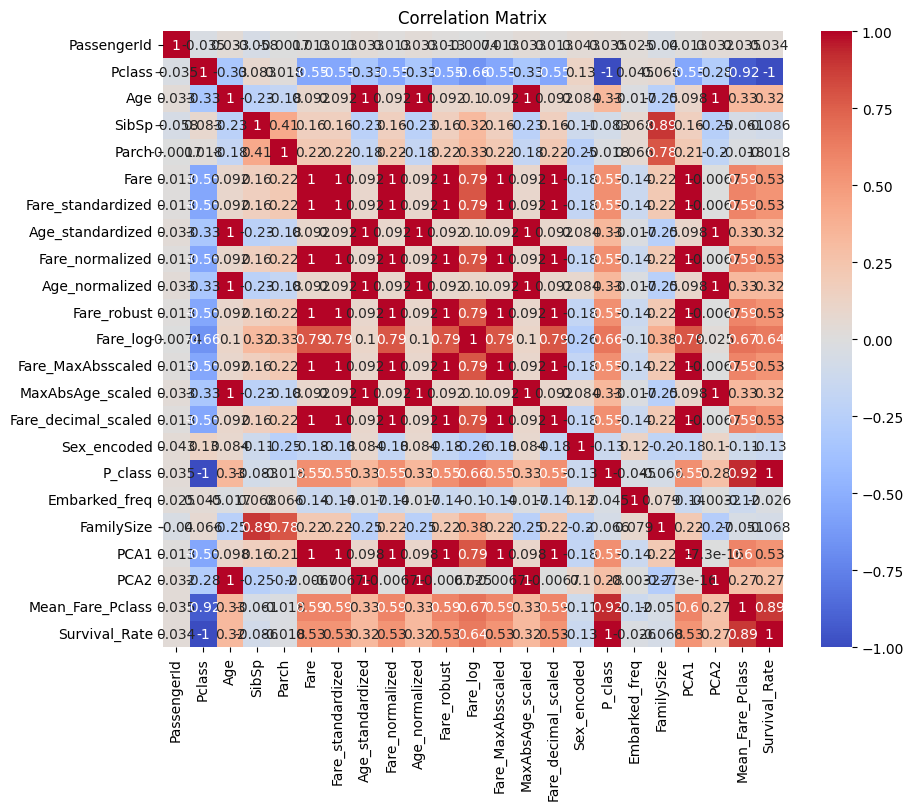

In [392]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


### Handling Multicollinearity:
-  Remove Highly Correlated Features
-  Apply Dimensionality Reduction (PCA)
- Regularization

## 15. Handling Date and Time Data

In [393]:
data = pd.read_csv('weather.csv')
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [394]:
data.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [398]:
# Convert 'Formatted Date' to datetime format
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], errors='coerce')

data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


### Extracting Date-Time Components

In [399]:
# Extract components from the datetime
data['Year'] = data['Formatted Date'].dt.year
data['Month'] = data['Formatted Date'].dt.month
data['Day'] = data['Formatted Date'].dt.day
data['Hour'] = data['Formatted Date'].dt.hour
data['Weekday'] = data['Formatted Date'].dt.weekday  # Monday=0, Sunday=6

# Display updated DataFrame
data[['Formatted Date', 'Year', 'Month', 'Day', 'Hour', 'Weekday']].head()


,Formatted Date,Year,Month,Day,Hour,Weekday
0,2006-04-01 00:00:00+02:00,2006.0,4.0,1.0,0.0,5.0
1,2006-04-01 01:00:00+02:00,2006.0,4.0,1.0,1.0,5.0
2,2006-04-01 02:00:00+02:00,2006.0,4.0,1.0,2.0,5.0
3,2006-04-01 03:00:00+02:00,2006.0,4.0,1.0,3.0,5.0
4,2006-04-01 04:00:00+02:00,2006.0,4.0,1.0,4.0,5.0


### Setting Date-Time as Index

In [400]:
# Set 'Formatted Date' as the index
data.set_index('Formatted Date', inplace=True)

# Check the DataFrame with the new index
data.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,Day,Hour,Weekday
Formatted Date,,,,,,,,,,,,,,,,
2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006.0,4.0,1.0,0.0,5.0
2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006.0,4.0,1.0,1.0,5.0
2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006.0,4.0,1.0,2.0,5.0
2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006.0,4.0,1.0,3.0,5.0
2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006.0,4.0,1.0,4.0,5.0


In [401]:
# Resample data to calculate the daily average temperature
# resample('D') method groups the data by daily intervals.
daily_avg_temp = data['Temperature (C)'].resample('D').mean()
daily_avg_temp.head()

Formatted Date
2006-03-26 00:00:00+02:00    12.837037
2006-03-27 00:00:00+02:00    14.066435
2006-03-28 00:00:00+02:00    13.952083
2006-03-29 00:00:00+02:00    10.409259
2006-03-30 00:00:00+02:00    11.132407
Name: Temperature (C), dtype: float64

In [402]:
# Resample to calculate monthly average humidity
monthly_avg_humidity = data['Humidity'].resample('M').mean()
print(monthly_avg_humidity.head())

Formatted Date
2006-03-31 00:00:00+02:00    0.700071
2006-04-30 00:00:00+02:00    0.729528
2006-05-31 00:00:00+02:00    0.720968
2006-06-30 00:00:00+02:00    0.746972
2006-07-31 00:00:00+02:00    0.656384
Name: Humidity, dtype: float64


C:\Users\mennaallah.osman\AppData\Local\Temp\ipykernel_29220\1048691705.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_humidity = data['Humidity'].resample('M').mean()


In [403]:
# Drop duplicate dates in the index
data = data[~data.index.duplicated(keep='first')]
data

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,Month,Day,Hour,Weekday
Formatted Date,,,,,,,,,,,,,,,,
2006-04-01 00:00:00+02:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006.0,4.0,1.0,0.0,5.0
2006-04-01 01:00:00+02:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006.0,4.0,1.0,1.0,5.0
2006-04-01 02:00:00+02:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006.0,4.0,1.0,2.0,5.0
2006-04-01 03:00:00+02:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006.0,4.0,1.0,3.0,5.0
2006-04-01 04:00:00+02:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006.0,4.0,1.0,4.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-09-09 19:00:00+02:00,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.,2016.0,9.0,9.0,19.0,4.0
2016-09-09 20:00:00+02:00,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.,2016.0,9.0,9.0,20.0,4.0
2016-09-09 21:00:00+02:00,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.,2016.0,9.0,9.0,21.0,4.0


In [404]:
# # Sort the index and return the sorted DataFrame
data = data.sort_index()

# Resample the data to fill missing dates (if necessary) and forward fill missing values
data = data.resample('D').asfreq().fillna(method='ffill')


C:\Users\mennaallah.osman\AppData\Local\Temp\ipykernel_29220\2352744767.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data = data.resample('D').asfreq().fillna(method='ffill')


## 16. Data Merging and Joining
### **Types of Joins**
There are four main types of joins:

- **Inner Join:** Returns only the rows with matching keys in both DataFrames.
- **Left Join:** Returns all rows from the left DataFrame and matching rows from the right DataFrame; non-matching rows in the right DataFrame are filled with NaN.
- **Right Join:** Returns all rows from the right DataFrame and matching rows from the left DataFrame; non-matching rows in the left DataFrame are filled with NaN.
- **Outer Join:** Returns all rows from both DataFrames, filling NaN for missing matches on either side.


### merge()

In [405]:
# Create a large DataFrame with 891 rows
df = pd.DataFrame({
    'PassengerId': np.random.randint(1, 1000, 891),  # Random passenger IDs
    'Destination': np.random.choice(['New York', 'Paris', 'London', 'Tokyo'], 891)  # Random destinations
})
df

,PassengerId,Destination
0,639,Tokyo
1,995,Paris
2,351,Tokyo
3,2,London
4,890,New York
...,...,...
886,788,Paris
887,563,London
888,447,London
889,494,Paris


In [406]:
pd.merge(titanic, df, on='PassengerId', how='inner')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Full_name,Age_bin_equal_width,Age_bin_equal_freq,Age_bin_custom,FamilySize,PCA1,PCA2,Mean_Fare_Pclass,Survival_Rate,Destination
0,1,False,3,"braund, Mr. owen harris",male,22.0,1,0,A/5 21171,7.2500,...,Mr. owen harris braund,Young,Q1,Young Adult,2,-25.143072,-7.061856,13.675550,0.242363,London
1,2,True,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,PC 17599,71.2833,...,mrs. john bradley (florence briggs thayer) cum...,Middle-aged,Q4,Adult,2,39.279265,7.291452,84.154687,0.629630,London
2,2,True,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,PC 17599,71.2833,...,mrs. john bradley (florence briggs thayer) cum...,Middle-aged,Q4,Adult,2,39.279265,7.291452,84.154687,0.629630,Tokyo
3,2,True,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,PC 17599,71.2833,...,mrs. john bradley (florence briggs thayer) cum...,Middle-aged,Q4,Adult,2,39.279265,7.291452,84.154687,0.629630,Paris
4,2,True,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,PC 17599,71.2833,...,mrs. john bradley (florence briggs thayer) cum...,Middle-aged,Q4,Adult,2,39.279265,7.291452,84.154687,0.629630,London
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,887,False,2,"montvila, rev. juozas",male,27.0,0,0,211536,13.0000,...,rev. juozas montvila,Young,Q2,Young Adult,1,-19.270126,-2.190587,20.662183,0.472826,London
789,890,True,1,"behr, Mr. karl howell",male,26.0,0,0,111369,30.0000,...,Mr. karl howell behr,Young,Q2,Young Adult,1,-2.301626,-3.624428,84.154687,0.629630,New York
790,891,False,3,"dooley, Mr. patrick",male,32.0,0,0,370376,7.7500,...,Mr. patrick dooley,Young,Q3,Young Adult,1,-24.389910,2.940413,13.675550,0.242363,New York
791,891,False,3,"dooley, Mr. patrick",male,32.0,0,0,370376,7.7500,...,Mr. patrick dooley,Young,Q3,Young Adult,1,-24.389910,2.940413,13.675550,0.242363,London


## 17. Dealing with Sparse Data

## 18. Type Casting
Type casting, or data type conversion, is the process of converting a DataFrame column from one data type to another. 

In [408]:
print(titanic.dtypes)


PassengerId               int64
Survived                   bool
Pclass                    int64
Name                     object
Sex                      object
Age                     float64
SibSp                     int64
Parch                     int64
Ticket                   object
Fare                    float64
Embarked                 object
Fare_standardized       float64
Age_standardized        float64
Fare_normalized         float64
Age_normalized          float64
Fare_robust             float64
Fare_log                float64
Fare_MaxAbsscaled       float64
MaxAbsAge_scaled        float64
Fare_decimal_scaled     float64
Sex_encoded               int32
P_class                   int64
Embarked_freq           float64
Title                    object
Full_name                object
Age_bin_equal_width    category
Age_bin_equal_freq     category
Age_bin_custom         category
FamilySize                int64
PCA1                    float64
PCA2                    float64
Mean_Far

### Converting Data Types with astype()

In [409]:
titanic['Age'] = titanic['Age'].astype('float32')

In [410]:
titanic['Pclass'] = titanic['Pclass'].astype('category')


### Downcasting Numeric Types
Downcasting reduces the size of numeric columns by converting them to smaller types without data loss.

In [ ]:
titanic['Fare'] = pd.to_numeric(titanic['Fare'], downcast='float')
titanic['SibSp'] = pd.to_numeric(titanic['SibSp'], downcast='integer')